In [204]:
#set up
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [205]:
#load relevant data files: taken from: https://www.kaggle.com/ekrembayar/avatar-the-last-air-bender
avatar_data = pd.read_csv("./avatar.csv",index_col="id", encoding='cp1252')
avatar_data

,Unnamed: 0,book,book_num,chapter,chapter_num,character,full_text,character_words,writer,director,imdb_rating
id,,,,,,,,,,,
1,1,Water,1,The Boy in the Iceberg,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
2,2,Water,1,The Boy in the Iceberg,1,Scene Description,"As the title card fades, the scene opens onto ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
3,3,Water,1,The Boy in the Iceberg,1,Sokka,It's not getting away from me this time. [Clos...,It's not getting away from me this time. Watc...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
4,4,Water,1,The Boy in the Iceberg,1,Scene Description,"The shot pans quickly from the boy to Katara, ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
5,5,Water,1,The Boy in the Iceberg,1,Katara,"[Happily surprised.] Sokka, look!","Sokka, look!","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
...,...,...,...,...,...,...,...,...,...,...,...
13381,13381,Fire,3,"Sozin's Comet, Part 4: Avatar Aang",21,Suki,And why did you paint me firebending?,And why did you paint me firebending?,"Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8
13382,13382,Fire,3,"Sozin's Comet, Part 4: Avatar Aang",21,Sokka,I thought it looked more exciting that way. [M...,I thought it looked more exciting that way. O...,"Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8
13383,13383,Fire,3,"Sozin's Comet, Part 4: Avatar Aang",21,Iroh,"[Points at painting.] Hey, my belly's not that...","Hey, my belly's not that big anymore. I've rea...","Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8


In [206]:

avatar_data = avatar_data.drop(['Unnamed: 0'], axis=1) #drop unnamed row....
avatar_data = avatar_data.rename(columns={'character_words':'line'})
avatar_data = avatar_data.dropna(subset=['line']) #removes all
null_data = avatar_data[avatar_data.isnull().any(axis=1)]
null_data #the rating for episode 20 of book 1 is null, repplace it
avatar_data.loc[avatar_data.imdb_rating.isnull(),'imdb_rating'] = 9.7



In [207]:
#add some rows
def episode_num(row):
    if(row.book_num==1):
        return row.chapter_num
    elif(row.book_num==2):
        return 20 + row.chapter_num
    elif(row.book_num==3):
        return 40 + row.chapter_num
avatar_data['episode_num'] = avatar_data.apply(episode_num,axis=1)
avatar_data

,book,book_num,chapter,chapter_num,character,full_text,line,writer,director,imdb_rating,episode_num
id,,,,,,,,,,,
1,Water,1,The Boy in the Iceberg,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1,1
3,Water,1,The Boy in the Iceberg,1,Sokka,It's not getting away from me this time. [Clos...,It's not getting away from me this time. Watc...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1,1
5,Water,1,The Boy in the Iceberg,1,Katara,"[Happily surprised.] Sokka, look!","Sokka, look!","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1,1
6,Water,1,The Boy in the Iceberg,1,Sokka,"[Close-up of Sokka; whispering.] Sshh! Katara,...","Sshh! Katara, you're going to scare it away. ...","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1,1
8,Water,1,The Boy in the Iceberg,1,Katara,[Struggling with the water that passes right i...,"But, Sokka! I caught one!","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1,1
...,...,...,...,...,...,...,...,...,...,...,...
13380,Fire,3,"Sozin's Comet, Part 4: Avatar Aang",21,Mai,I look like a man.,I look like a man.,"Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8,61
13381,Fire,3,"Sozin's Comet, Part 4: Avatar Aang",21,Suki,And why did you paint me firebending?,And why did you paint me firebending?,"Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8,61
13382,Fire,3,"Sozin's Comet, Part 4: Avatar Aang",21,Sokka,I thought it looked more exciting that way. [M...,I thought it looked more exciting that way. O...,"Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8,61


Text(0.5, 0.98, 'IMDB Rating of Avatar: The Last Airbender Episodes')

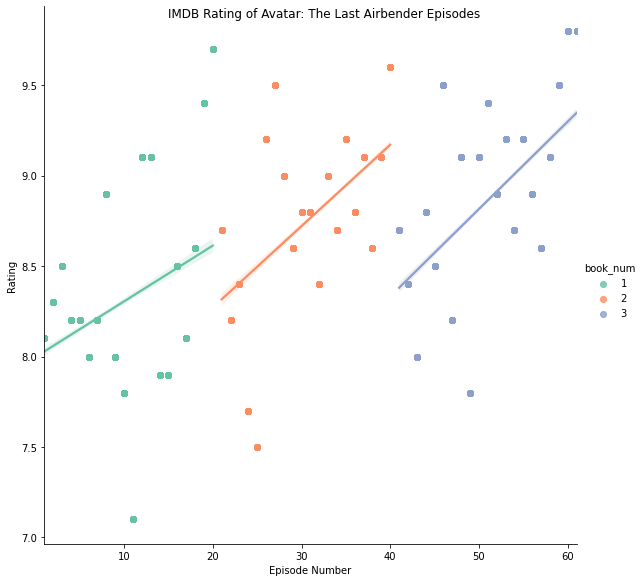

In [208]:
#get rating for each season....
rating_graph = sns.lmplot(data=avatar_data, x="episode_num", y="imdb_rating", hue="book_num", palette="Set2",height=8)
rating_graph = rating_graph.set_axis_labels("Episode Number", "Rating")
fig = rating_graph.fig;
fig.suptitle("IMDB Rating of Avatar: The Last Airbender Episodes")

Text(0.5, 0, 'rating')

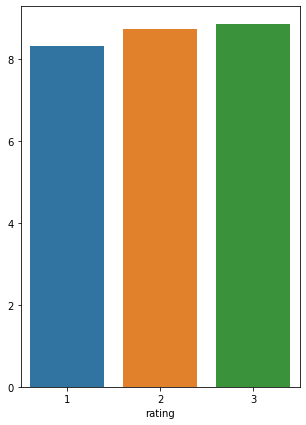

In [209]:
avg_rating=[]
for i in range(1,4):
    avg_rating.append(avatar_data.loc[avatar_data.book_num==i].imdb_rating.mean())
avg_rating
plt.figure(figsize=(5,7))
ax = sns.barplot(y=avg_rating,x=[1,2,3],dodge=False)
ax.set_xlabel('rating')

<Figure size 864x504 with 0 Axes>

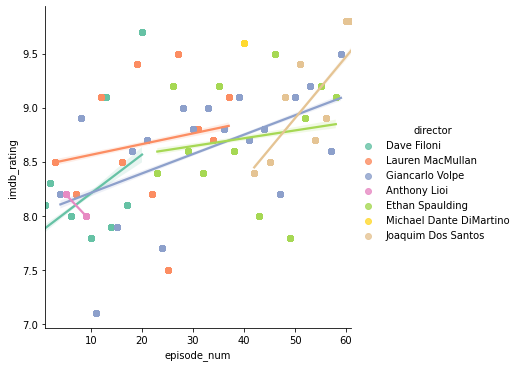

In [216]:
plt.figure(figsize=(12,7))
sns.lmplot(data=avatar_data, x="episode_num", y="imdb_rating", hue="director", palette="Set2")
#sns.scatterplot(y=avatar_data["imdb_rating"], x=avatar_data["director"])

<AxesSubplot:xlabel='character', ylabel='count'>

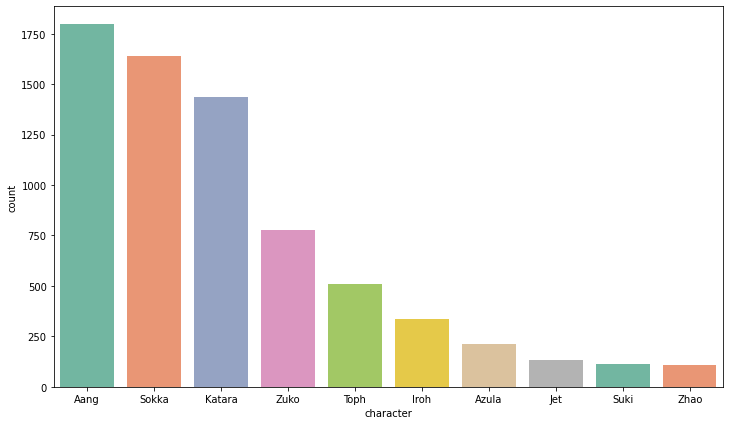

In [211]:
#which character that the most lines?
plt.figure(figsize=(12,7))
sns.countplot(data=avatar_data,x="character", order=avatar_data.character.value_counts().iloc[:40].index, palette="Set2")

In [212]:
#sns.swarmplot(y=avatar_data["imdb_rating"], x=avatar_data["director"])

<AxesSubplot:xlabel='character', ylabel='count'>

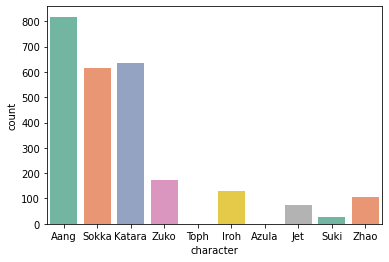

In [223]:
sns.countplot(data=avatar_data.loc[avatar_data.book_num==1],x="character", order=avatar_data.character.value_counts().iloc[:10].index, palette="Set2")

<AxesSubplot:xlabel='character', ylabel='count'>

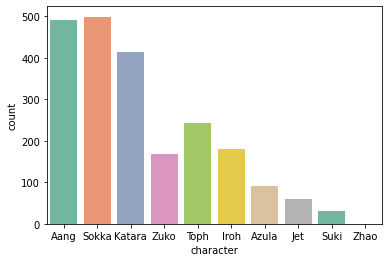

In [220]:
sns.countplot(data=avatar_data.loc[avatar_data.book_num==2],x="character", order=avatar_data.character.value_counts().iloc[:10].index, palette="Set2")

<AxesSubplot:xlabel='character', ylabel='count'>

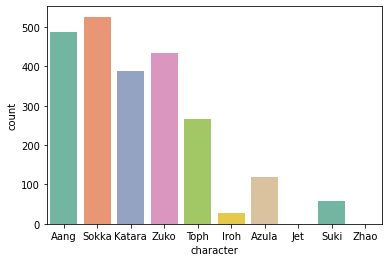

In [221]:
sns.countplot(data=avatar_data.loc[avatar_data.book_num==3],x="character", order=avatar_data.character.value_counts().iloc[:10].index, palette="Set2")